Import Libraries

In [43]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate



 # EDA

Reading the data set

In [44]:

data= pd.read_csv('dataset.csv')

In [45]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [46]:
data.shape

(4424, 35)

We have 4424 rows and 35 columns


In [47]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [48]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [49]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

Nb of unique values for each column

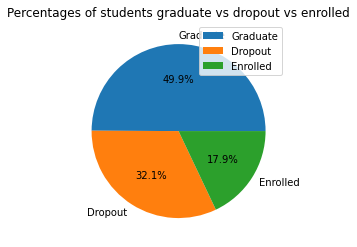

In [50]:

st_summary = data['Target'].value_counts()

plt.pie(st_summary, labels=st_summary.index, autopct='%1.1f%%')
plt.title('Percentages of students graduate vs dropout vs enrolled')
plt.legend()
plt.show()

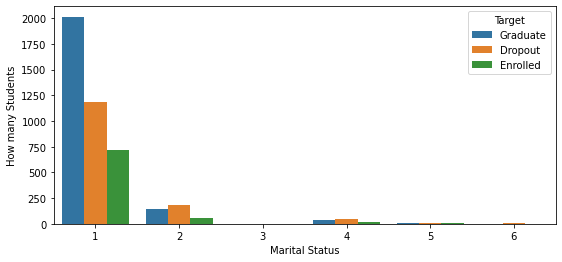

In [51]:
plt.figure(figsize=(9,4))

sns.countplot(data=data, x='Marital status', hue='Target', hue_order=['Graduate', 'Dropout', 'Enrolled'])

plt.xticks(ticks=[0,1,2,3,4,5])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')
plt.show()

The majority of data are from group 1 and 2, and regarding the results it seems that 1 is 'single' and is 'married' as the % of dropout in the group 2 is larger.

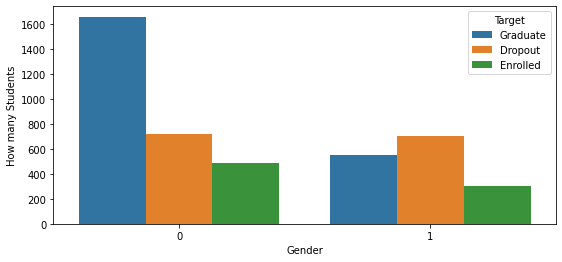

In [52]:
plt.figure(figsize=(9,4))

sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Graduate', 'Dropout', 'Enrolled'])

plt.xticks(ticks=[0,1])
plt.xlabel('Gender')
plt.ylabel('How many Students')
plt.show()

The gender has effect on the % of graduation


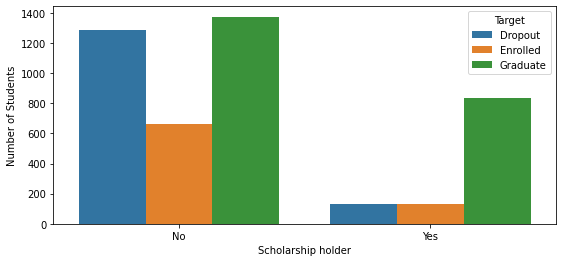

In [53]:
plt.figure(figsize=(9,4))
sns.countplot(data=data, x='Scholarship holder', hue='Target', hue_order=['Dropout','Enrolled','Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship holder')
plt.ylabel('Number of Students')
plt.show()

It's rare that a scholarship holder drop out

<Figure size 1080x720 with 0 Axes>

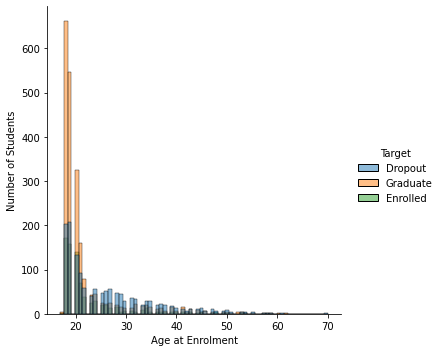

In [54]:
plt.figure(figsize=(15,10))
sns.displot(data=data, x='Age at enrollment', hue="Target", kde=False)
plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

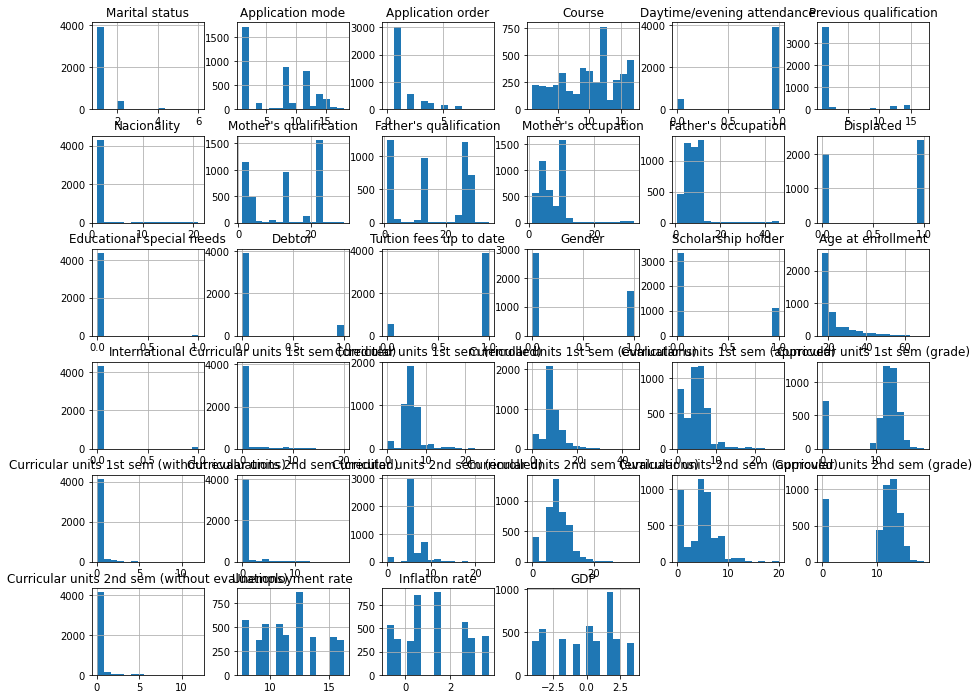

In [55]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

There are some columns not high distributed like in the nationality column the majority of data belong to a unique group.

## Plot the heatmap

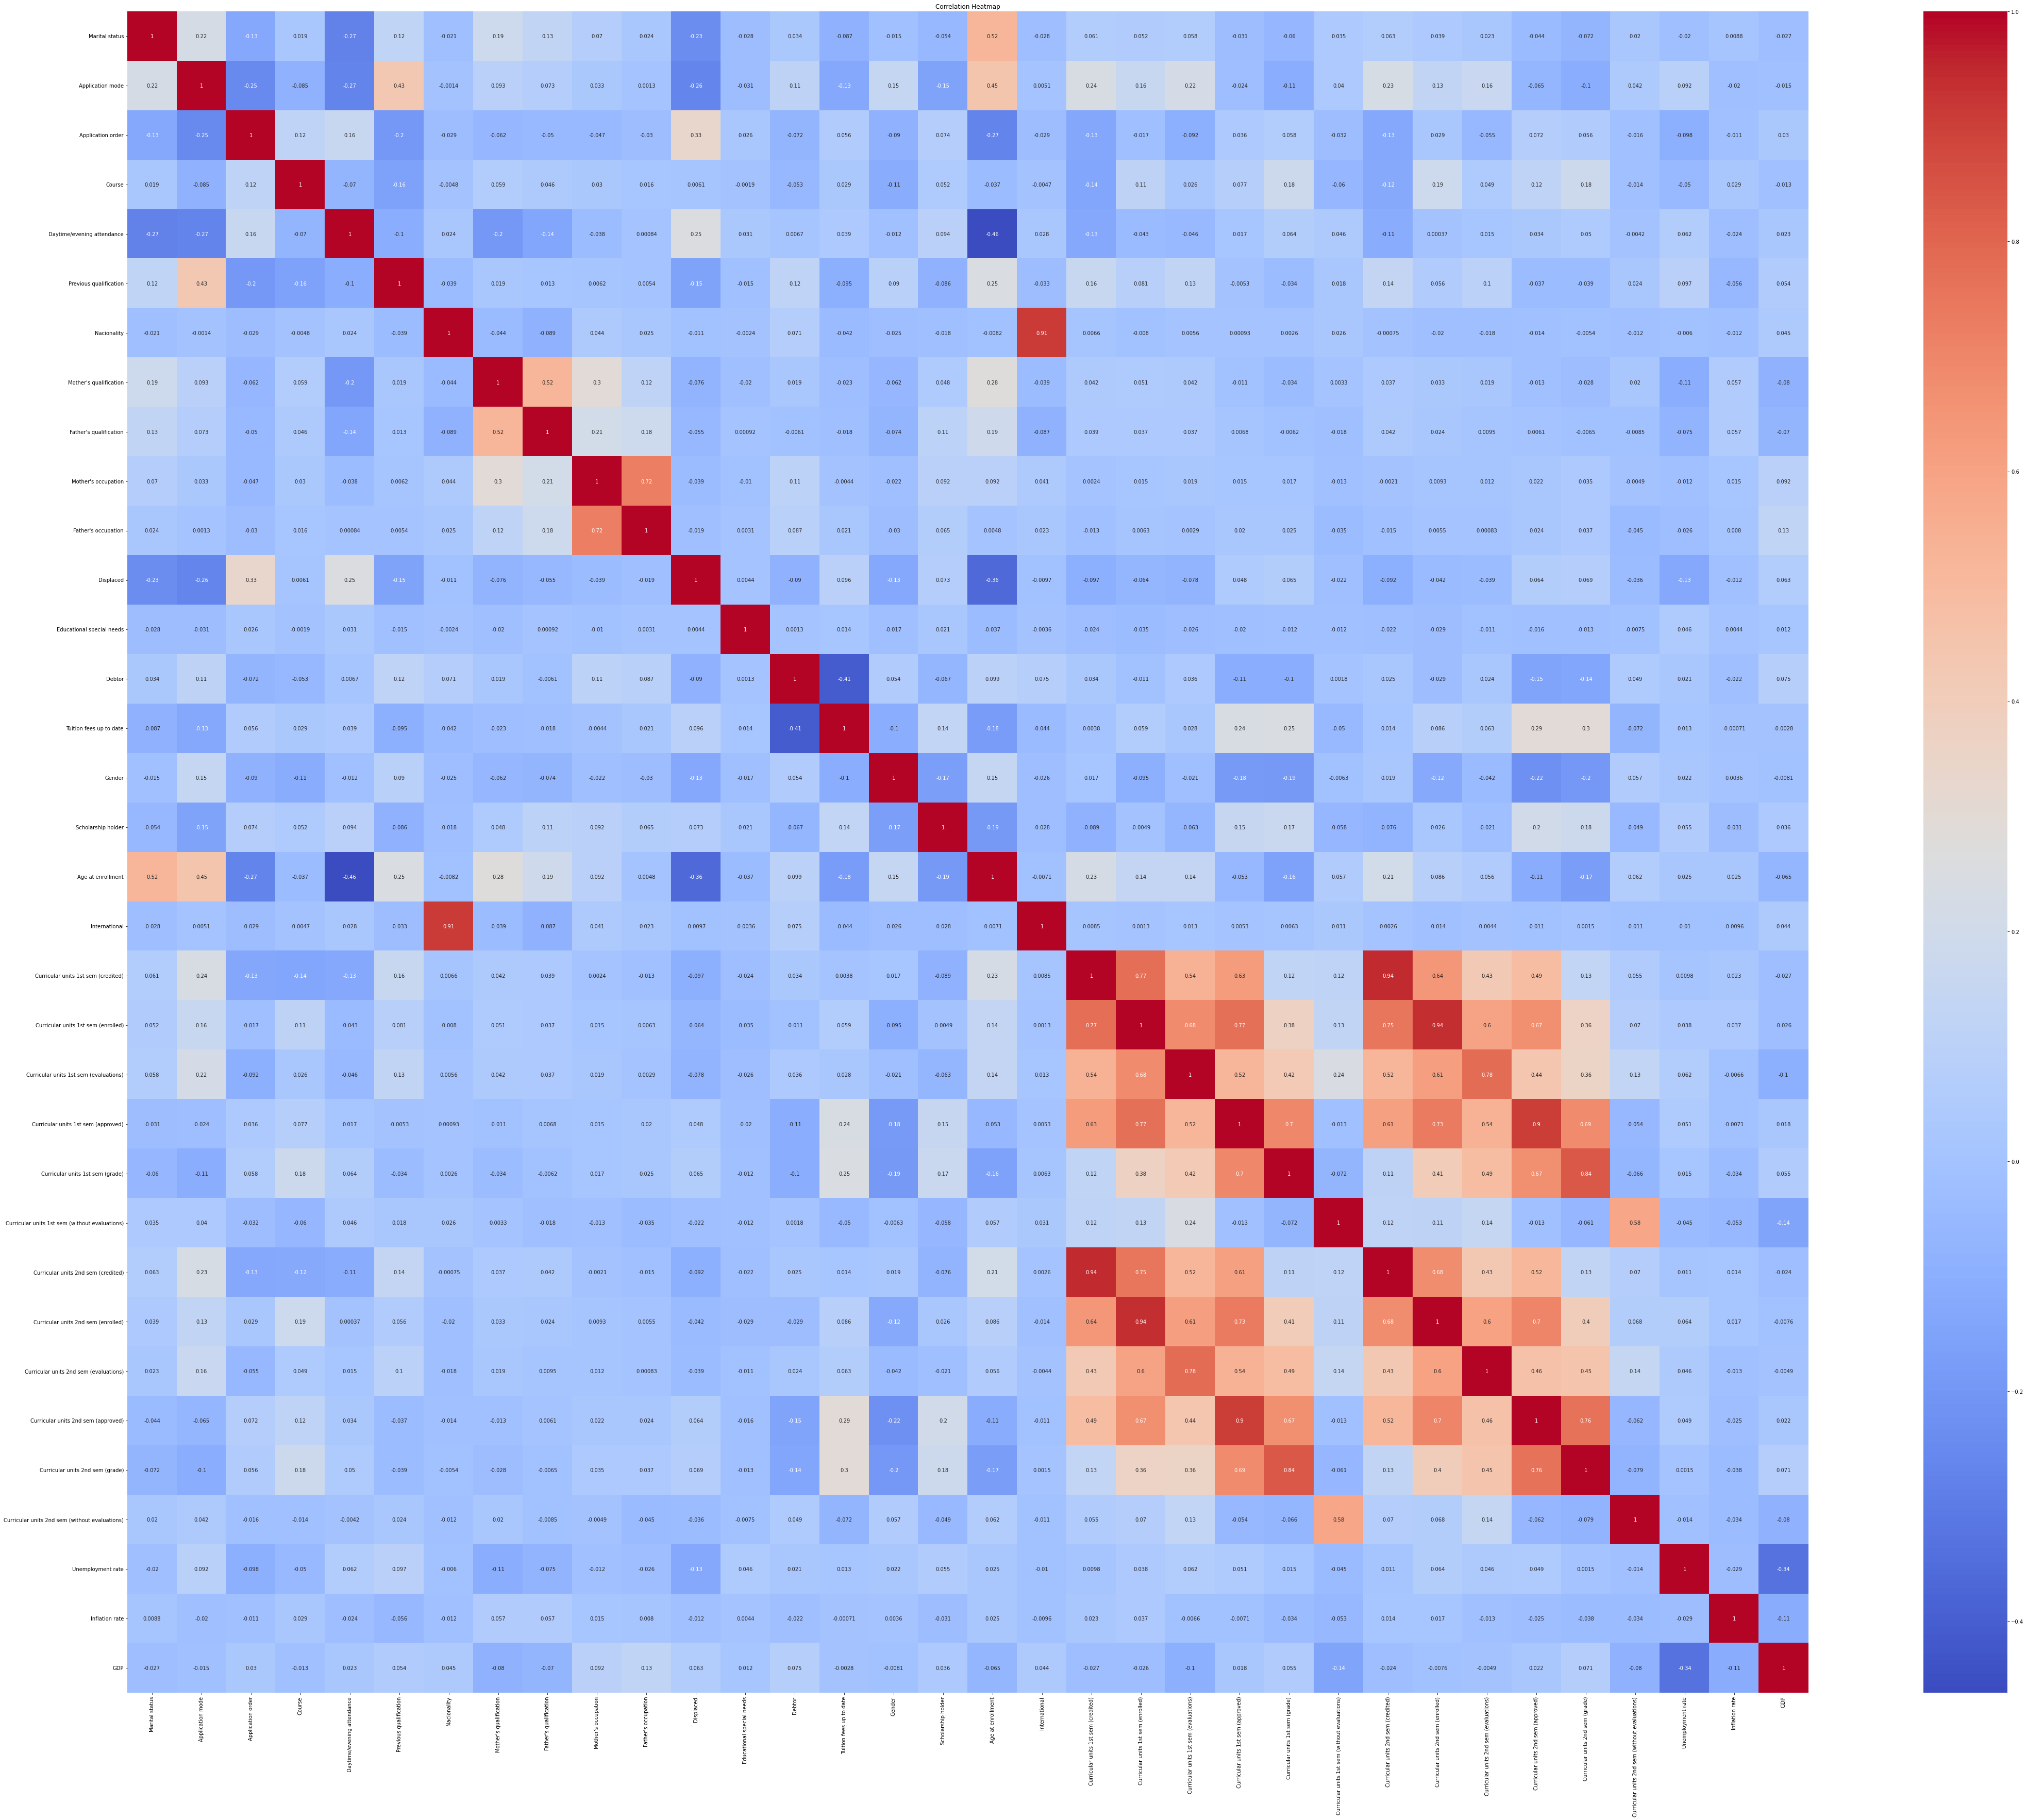

In [56]:

corr_matrix = data.corr()

plt.figure(figsize=(80, 60))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')

plt.show()

 We have high dependency between Nationnality and International so we can drop one of them. also we have dependencies between features related to sem 1 and those related to sem2.

In [57]:

encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Label encoding for Target (0: dropout ,1: enrolled ,2: graduate)

Find the correlation of Target with all other numeric columns

In [58]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

Looking at the corelation, we have to plot the effect of several columns having high correlation

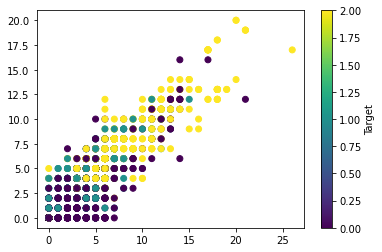

In [59]:
plt.scatter(data['Curricular units 1st sem (approved)'], data['Curricular units 2nd sem (approved)'], c=data['Target'], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Target')



possible relationship between changes observed between sem1 approved and sem2 approved, they are increasing proportionally. They have big correlation with the target, as much as they increase the probability of the student to graduate or still enrolled increase too.

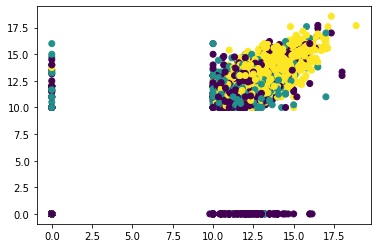

In [60]:
plt.scatter(data['Curricular units 1st sem (grade)'], data['Curricular units 2nd sem (grade)'], c=data['Target'], cmap='viridis')
plt.show()

If the grades are less then 10 in one of 2 semesters, the probability of dropout is high. Whereas when the grades are higher than 10 as they increase the probability of the student to graduate or still enrolled increase too.

# Data processing


In [61]:
data = data.drop_duplicates()
data= data.dropna()

delete duplicates and nan rows

In [62]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Draw box plot

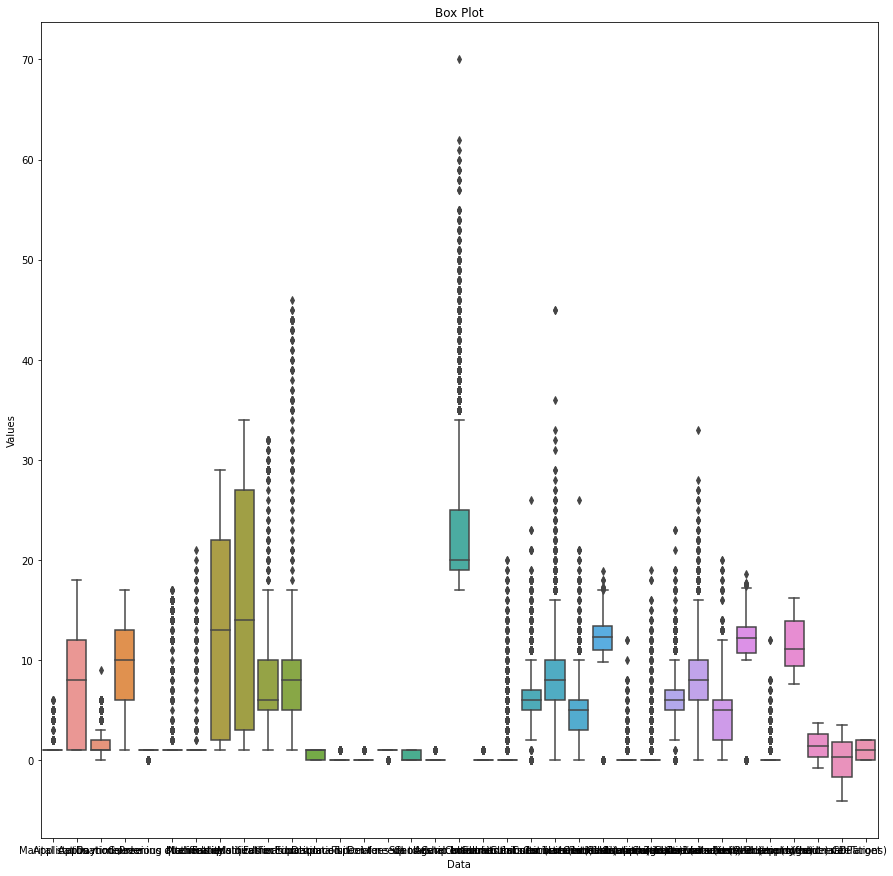

In [63]:


plt.figure(figsize=(15, 15))
sns.boxplot(data=data)
plt.title("Box Plot")
plt.xlabel("Data")
plt.ylabel("Values")
plt.show()

we have to delete those outlayers using IQR

In [64]:
for x in data:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8.0,NaN,2.0,1.0,1.0,1.0,13.0,10.0,6.0,...,0.0,NaN,0.0,0.0,NaN,0.0,10.8,1.4,1.74,0.0
1,1.0,6.0,1.0,11.0,1.0,1.0,1.0,1.0,3.0,4.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,2.0
2,1.0,1.0,NaN,5.0,1.0,1.0,1.0,22.0,27.0,10.0,...,0.0,6.0,0.0,0.0,NaN,0.0,10.8,1.4,1.74,0.0
3,1.0,8.0,2.0,15.0,1.0,1.0,1.0,23.0,27.0,6.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,2.0
4,NaN,12.0,1.0,3.0,NaN,1.0,1.0,22.0,28.0,10.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,2.0


In [65]:
data.isnull().sum()

Marital status                                     505
Application mode                                     0
Application order                                  541
Course                                               0
Daytime/evening attendance                         483
Previous qualification                             707
Nacionality                                        110
Mother's qualification                               0
Father's qualification                               0
Mother's occupation                                 84
Father's occupation                                 84
Displaced                                            0
Educational special needs                           51
Debtor                                             503
Tuition fees up to date                            528
Gender                                               0
Scholarship holder                                1099
Age at enrollment                                  441
Internatio

In [66]:
data= data.dropna()
data.shape

(948, 35)

Redraw the box plot


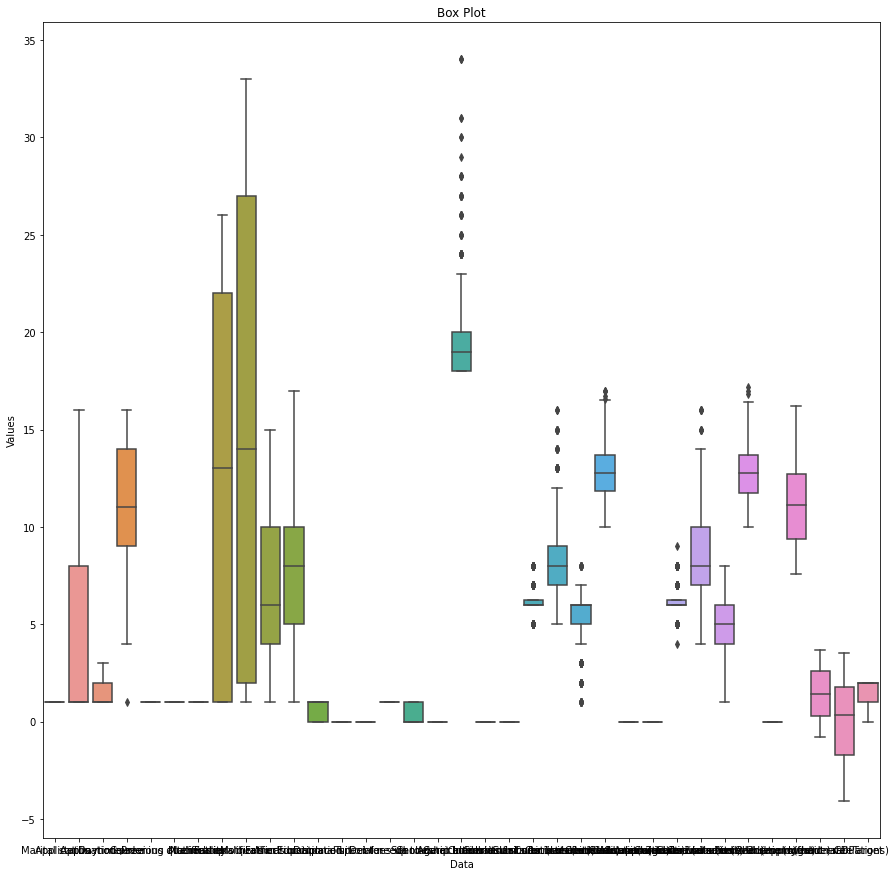

In [67]:

plt.figure(figsize=(15, 15))
sns.boxplot(data=data)
plt.title("Box Plot")
plt.xlabel("Data")
plt.ylabel("Values")
plt.show()

#  Feautre Selection


Using Select KBest

In [68]:

X = data.drop("Target", axis=1)
y = data["Target"]
selector = SelectKBest(score_func=f_classif, k=12)  # Select top 10 features
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected Feature Indices:")
print(selected_indices)

Selected Feature Indices:
[ 1  2 15 17 20 21 22 23 26 27 28 29]


In [69]:
data= data.iloc[ :,[1,2,15,17,20, 21, 22 ,23 ,26 ,27, 28, 29]]

Extract the important features only

In [70]:
data.head()

,Application mode,Application order,Gender,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
3,8.0,2.0,0.0,20.0,6.0,8.0,6.0,13.428571,6.0,10.0,5.0,12.400
10,1.0,1.0,0.0,18.0,6.0,6.0,6.0,12.333333,6.0,7.0,5.0,14.200
16,9.0,1.0,0.0,18.0,6.0,10.0,1.0,12.000000,6.0,14.0,2.0,11.000
17,8.0,2.0,0.0,18.0,7.0,8.0,7.0,13.306250,8.0,8.0,8.0,14.545
19,1.0,1.0,0.0,18.0,7.0,7.0,6.0,11.666667,7.0,8.0,6.0,13.500


Splitting the Data

In [71]:

X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2, random_state=1 )

# Model Selection

We use this student dataset and apply these models to find out which one gives better performance.

## Desicion Tree


### Training

Accuracy in training 1.0
Accuracy: 0.6368421052631579


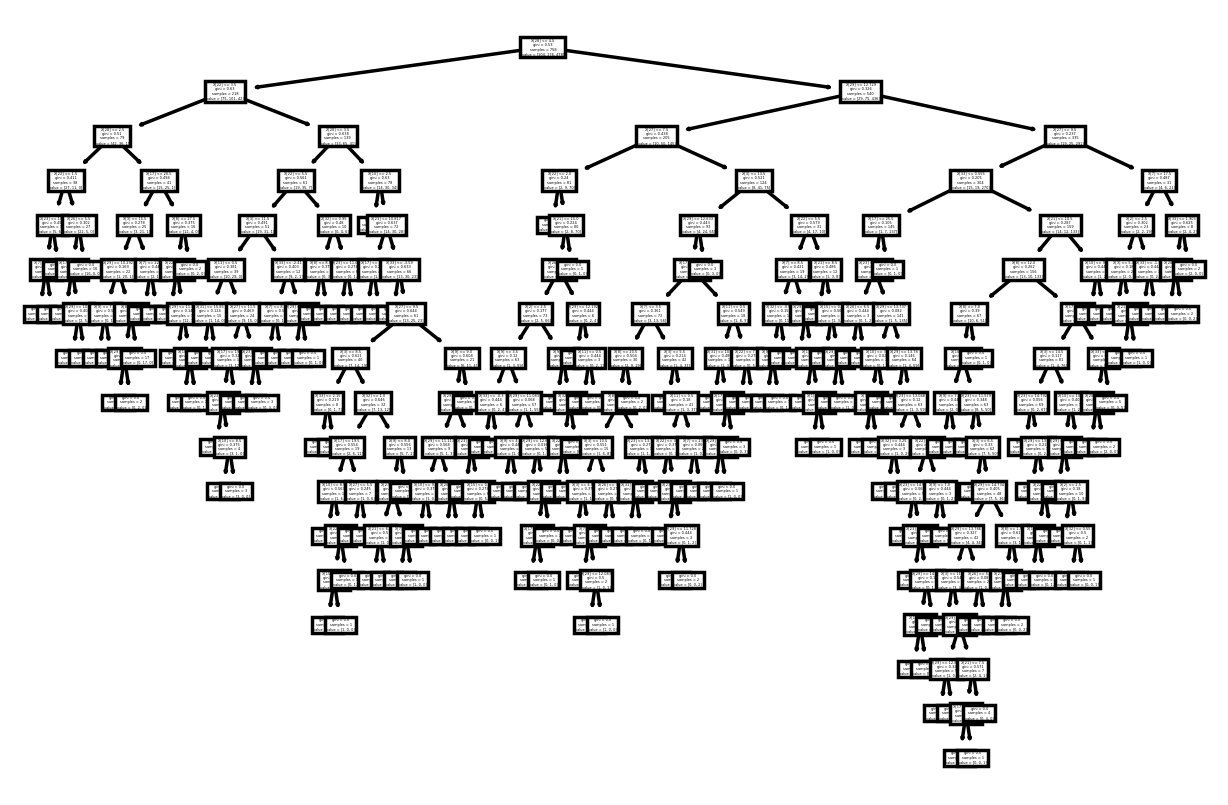

In [72]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred_train=clf.predict(X_train1)
y_pred1 = clf.predict(X_test1)



f = plt.figure()
f.set_dpi(250)
tree.plot_tree(clf)

print("Accuracy in training",metrics.accuracy_score(y_train1,y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

We have overfitting (accuracy on training= 100%) so we have to do prepuning by early stop or postpruning by using cost complexity

Prepruning

Accuracy in training 0.7598944591029023
Accuracy: 0.7315789473684211


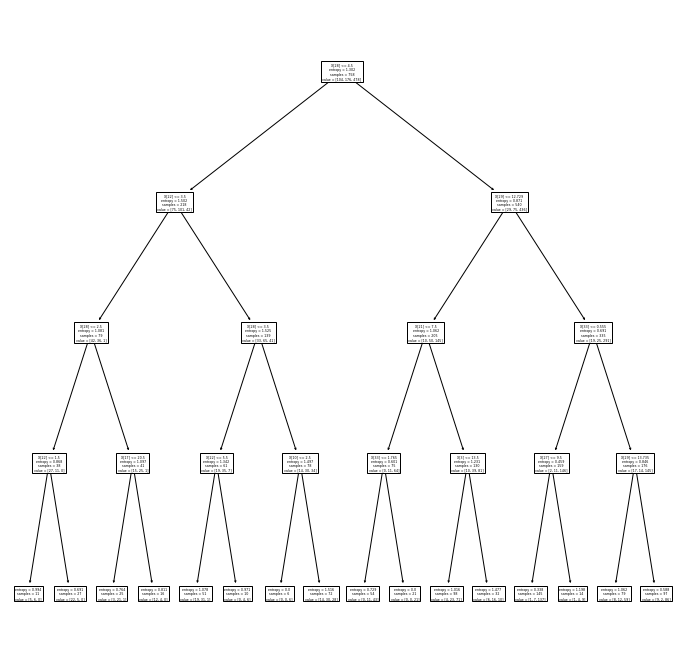

<Figure size 432x288 with 0 Axes>

In [84]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)
y_pred_train = clf.predict(X_train1)
print("Accuracy in training",metrics.accuracy_score(y_train1,y_pred_train))
#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))


plt.figure(figsize=(12,12)) 
tree.plot_tree(clf)
plt.show()
plt.savefig('tree_high_dpi', dpi=100)

Postpruning

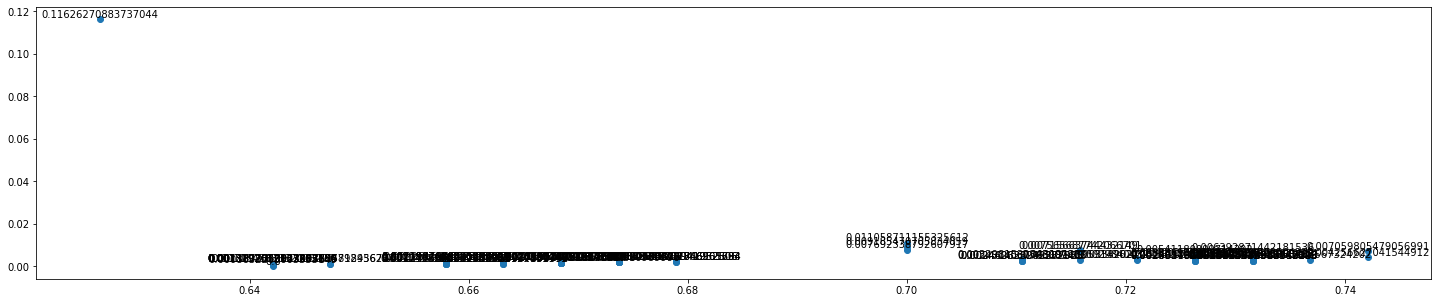

In [118]:
path=clf.cost_complexity_pruning_path(X_train1,y_train1)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train1,y_train1)
    clfs.append(clf)
train_scores = [clf.score(X_train1, y_train1) for clf in clfs]
test_scores = [clf.score(X_test1, y_test1) for clf in clfs]
plt.figure(figsize=(25,5))
plt.scatter(test_scores, ccp_alphas)
for i in range(len(test_scores)):
   
       plt.text(test_scores[i], ccp_alphas[i], str(ccp_alphas[i]), ha='center', va='bottom')

plt.show()

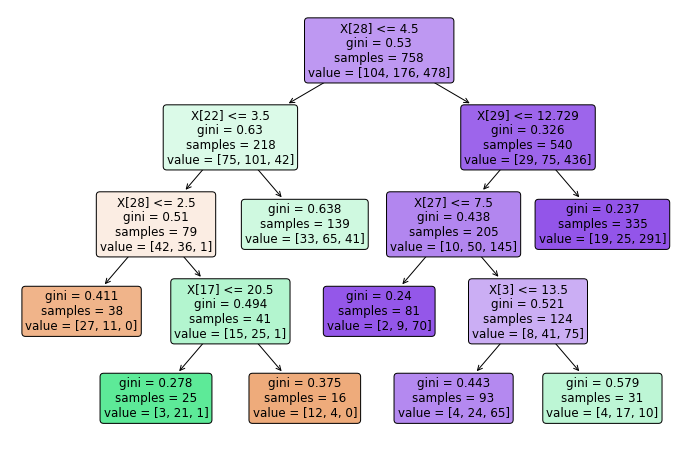

Accuracy: 0.7421052631578947


In [121]:

clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.00706)
clf.fit(X_train1,y_train1)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test1,clf.predict(X_test1)))

# Logistic Regression

## Training


In [75]:


modelLogistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
modelLogistic.fit(X_train1,y_train1)

y_pred_train = clf.predict(X_train1)
print("Accuracy in training",metrics.accuracy_score(y_train1,y_pred_train))


Accuracy in training 0.7730870712401056


## Testing

In [76]:


y_pred2= modelLogistic.predict(X_test1)
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test1, y_pred2)
print(ConfusionMatrix)

print(classification_report(y_test1,y_pred2))

[[  6   6  11]
 [  5  19  24]
 [  2  10 107]]
              precision    recall  f1-score   support

         0.0       0.46      0.26      0.33        23
         1.0       0.54      0.40      0.46        48
         2.0       0.75      0.90      0.82       119

    accuracy                           0.69       190
   macro avg       0.59      0.52      0.54       190
weighted avg       0.66      0.69      0.67       190



# Neural Network

Building the ANN + training

In [88]:

# Perform one-hot encoding using get_dummies function
y_train3 = tf.keras.utils.to_categorical(y_train1, num_classes=3)
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=20,input_shape=(X_train1.shape[1],),activation="tanh"))

 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=12,activation="tanh"))
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))

#Compiling ANN
ann.compile(optimizer='rmsprop',loss="categorical_crossentropy",metrics=['accuracy'])


#Fitting ANN
ann.fit(X_train1 , y_train3 , batch_size = 2 , epochs = 100)

Epoch 1/100
379/379 [==============================] - 1s 1ms/step - loss: 0.9019 - accuracy: 0.6280
Epoch 2/100
379/379 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.6412
Epoch 3/100
379/379 [==============================] - 1s 1ms/step - loss: 0.7825 - accuracy: 0.6755
Epoch 4/100
379/379 [==============================] - 1s 1ms/step - loss: 0.7672 - accuracy: 0.6675
Epoch 5/100
379/379 [==============================] - 1s 1ms/step - loss: 0.7488 - accuracy: 0.6939
Epoch 6/100
379/379 [==============================] - 1s 2ms/step - loss: 0.7130 - accuracy: 0.7005
Epoch 7/100
379/379 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.6992
Epoch 8/100
379/379 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.7190
Epoch 9/100
379/379 [==============================] - 1s 2ms/step - loss: 0.6657 - accuracy: 0.7230
Epoch 10/100
379/379 [==============================] - 1s 2ms/step - loss: 0.6672 - accura

We encode y_train into 3 columns and use softmax activation function for multi class

Testing

In [89]:
y_pred3=ann.predict(X_test1)
y_pred3=np.argmax(y_pred3, axis=1)
ConfusionMatrix = confusion_matrix(y_test1, y_pred3)
print(ConfusionMatrix)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred3))
print(classification_report(y_test1,y_pred3, zero_division=1))

[[  4  10   9]
 [  6  19  23]
 [  0  11 108]]
Accuracy: 0.6894736842105263
              precision    recall  f1-score   support

         0.0       0.40      0.17      0.24        23
         1.0       0.47      0.40      0.43        48
         2.0       0.77      0.91      0.83       119

    accuracy                           0.69       190
   macro avg       0.55      0.49      0.50       190
weighted avg       0.65      0.69      0.66       190



# SVM


In [79]:
from sklearn.model_selection import GridSearchCV
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train1, y_train1)





SVC(kernel='linear')

In [80]:

#Predict the response for test dataset
y_pred4 = clf.predict(X_test1)

ConfusionMatrix = confusion_matrix(y_test1, y_pred4)
print(ConfusionMatrix)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred4))
print(classification_report(y_test1,y_pred4, zero_division=1))

[[  6   4  13]
 [  6  18  24]
 [  3   7 109]]
Accuracy: 0.7
              precision    recall  f1-score   support

         0.0       0.40      0.26      0.32        23
         1.0       0.62      0.38      0.47        48
         2.0       0.75      0.92      0.82       119

    accuracy                           0.70       190
   macro avg       0.59      0.52      0.54       190
weighted avg       0.67      0.70      0.67       190



### SVM with GridSearch cv

In [81]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train1, y_train1)
print("Accuracy:", grid_search.best_score_)

Accuracy: 0.7256099686301847


In [82]:
y_pred4 = grid_search.predict(X_test1)

ConfusionMatrix = confusion_matrix(y_test1, y_pred4)
print(ConfusionMatrix)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred4))
print(classification_report(y_test1,y_pred4, zero_division=1))

[[  6   4  13]
 [  5  19  24]
 [  3   7 109]]
Accuracy: 0.7052631578947368
              precision    recall  f1-score   support

         0.0       0.43      0.26      0.32        23
         1.0       0.63      0.40      0.49        48
         2.0       0.75      0.92      0.82       119

    accuracy                           0.71       190
   macro avg       0.60      0.52      0.54       190
weighted avg       0.68      0.71      0.68       190



We choose the desicion tree model because it gives the highest accuracy on training 75 and on testing 73